In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
import plotly.graph_objects as go
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [ ]:
from google.colab import files
adfiles= files.upload()

Saving AgeGroupDetails.csv to AgeGroupDetails.csv
Saving covid_19_india.csv to covid_19_india.csv
Saving HospitalBedsIndia.csv to HospitalBedsIndia.csv
Saving ICMRTestingLabs.csv to ICMRTestingLabs.csv
Saving IndividualDetails.csv to IndividualDetails.csv
Saving population_india_census2011.csv to population_india_census2011.csv
Saving StatewiseTestingDetails.csv to StatewiseTestingDetails.csv


In [ ]:
ageGroup = pd.read_csv('AgeGroupDetails.csv')
covid19India = pd.read_csv('covid_19_india.csv')
hospitalBeds = pd.read_csv('HospitalBedsIndia.csv')
icmrTestLabs = pd.read_csv('ICMRTestingLabs.csv')
indiDetails = pd.read_csv('IndividualDetails.csv')
indiaCencus = pd.read_csv('population_india_census2011.csv')
stateDetails = pd.read_csv('StatewiseTestingDetails.csv')


Age Group Analysis

Most Number of cases have occured in the age group **20-50**

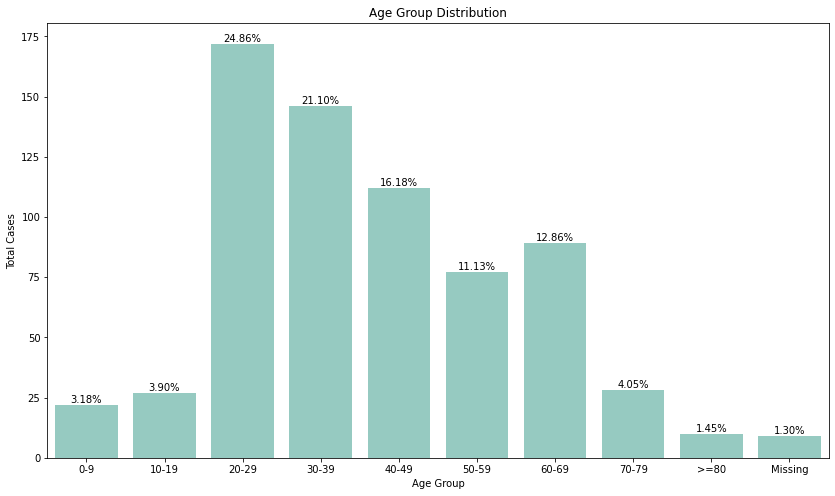

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases',color=sns.color_palette('Set3')[0])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')
    
from IPython.display import display, Markdown
display(Markdown("Most Number of cases have occured in the age group **20-50**"))

Gender wise Analysis

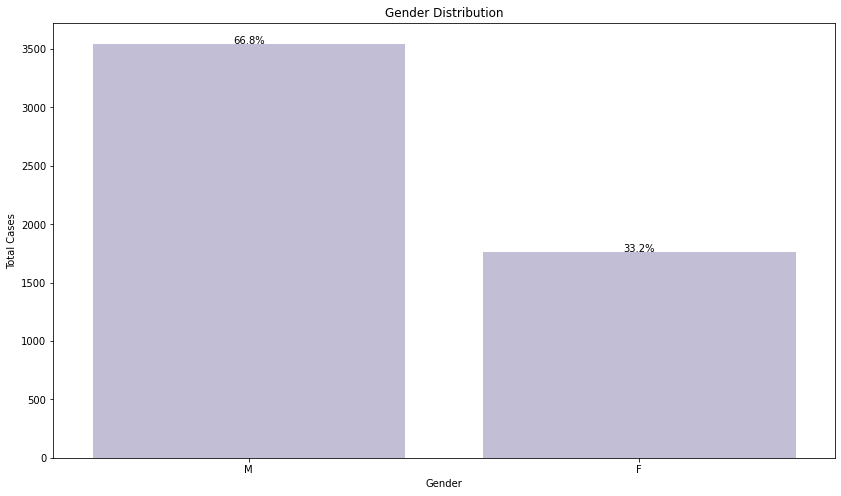

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(data=indiDetails,x='gender',order=indiDetails['gender'].value_counts().index,color=sns.color_palette('Set3')[2])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Cases')
order2 = indiDetails['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / indiDetails.gender.dropna().count() )
    plt.text(i,count+2,strt,ha='center')

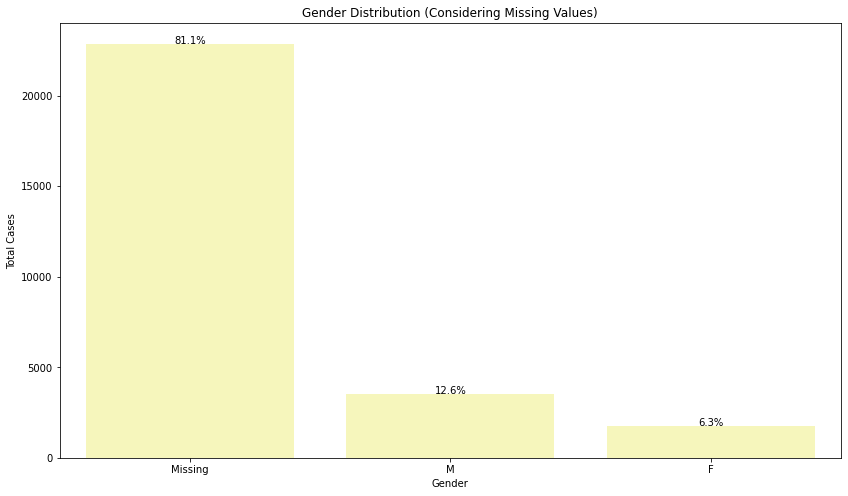

In [ ]:
indiDetails.gender.fillna('Missing',inplace = True)
plt.figure(figsize=(14,8))
sns.countplot(data=indiDetails,x='gender',order=indiDetails['gender'].value_counts().index,color=sns.color_palette('Set3')[1])
plt.title('Gender Distribution (Considering Missing Values)')
plt.xlabel('Gender')
plt.ylabel('Total Cases')
order2 = indiDetails['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / indiDetails.shape[0])
    plt.text(i,count+2,strt,ha='center')

Cases in India

In [ ]:
covid19India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       5616 non-null   int64 
 1   Date                      5616 non-null   object
 2   Time                      5616 non-null   object
 3   State/UnionTerritory      5616 non-null   object
 4   ConfirmedIndianNational   5616 non-null   object
 5   ConfirmedForeignNational  5616 non-null   object
 6   Cured                     5616 non-null   int64 
 7   Deaths                    5616 non-null   int64 
 8   Confirmed                 5616 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 395.0+ KB


In [ ]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
df1=covid19India.groupby('Date').sum()
df1.reset_index(inplace=True)

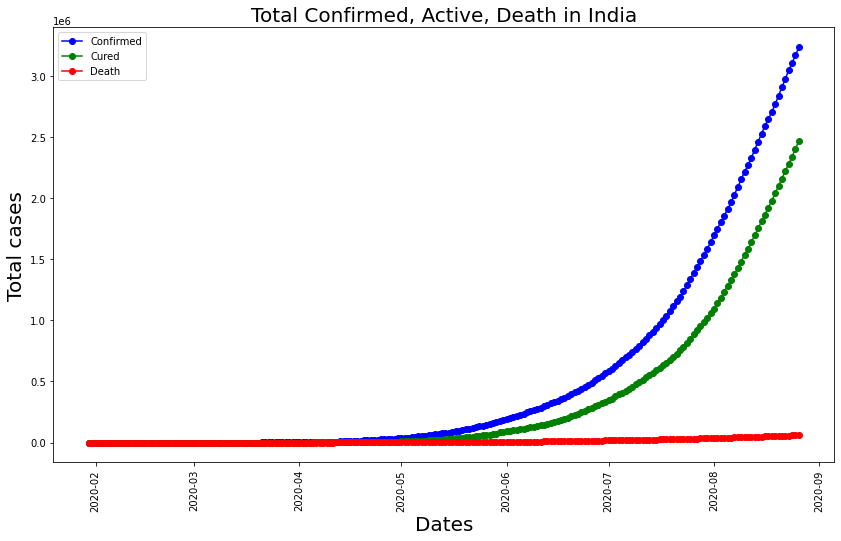

In [ ]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend();

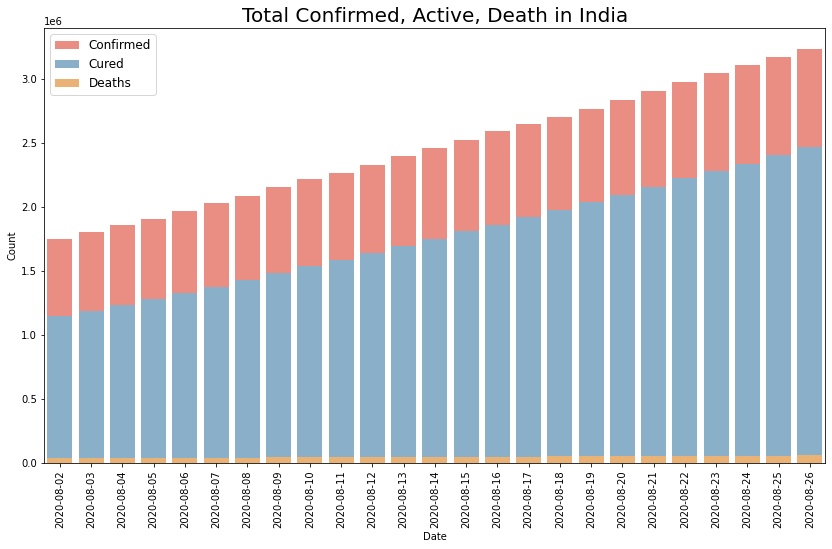

In [ ]:
df2=df1.tail(25)
df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12);

In [ ]:
state_cases=covid19India.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])


,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,703823,22794,514790,211827,3.240000,73.140000
32,Tamil Nadu,391303,6721,332454,65570,1.720000,84.960000
1,Andhra Pradesh,371639,3460,278247,96852,0.930000,74.870000
18,Karnataka,291826,4958,204439,92345,1.700000,70.060000
39,Uttar Pradesh,197388,3059,144754,55693,1.550000,73.330000
11,Delhi,164071,4330,147743,20658,2.640000,90.050000
41,West Bengal,144801,2909,114543,33167,2.010000,79.100000
4,Bihar,124536,519,104301,20754,0.420000,83.750000
35,Telengana,111688,780,85223,27245,0.700000,76.300000
3,Assam,94592,260,74814,20038,0.270000,79.090000


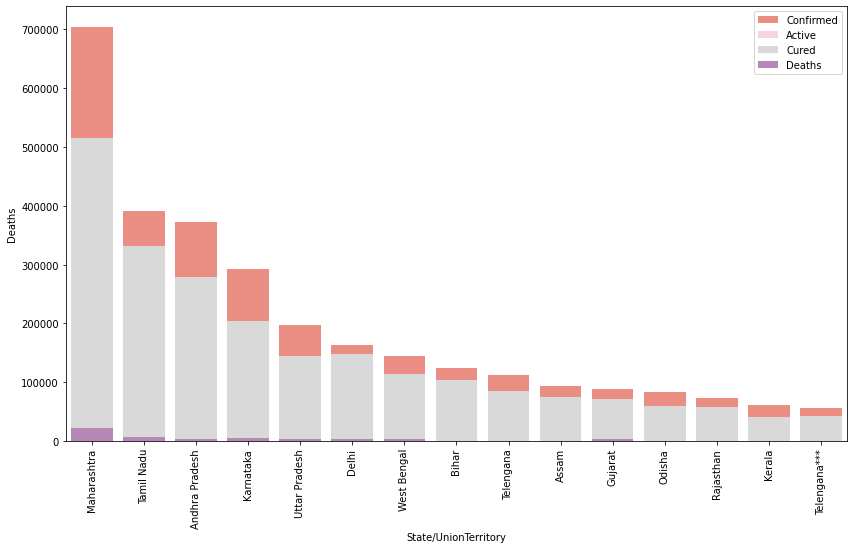

In [ ]:
state_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0)
state_cases=state_cases.head(15)
state_cases
plt.figure(figsize=(14,8))
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Active',color=sns.color_palette('Set3')[7],label='Active')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Cured',color=sns.color_palette('Set3')[8],label='Cured')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Deaths',color=sns.color_palette('Set3')[9],label='Deaths')
plt.xticks(rotation=90)
plt.legend();

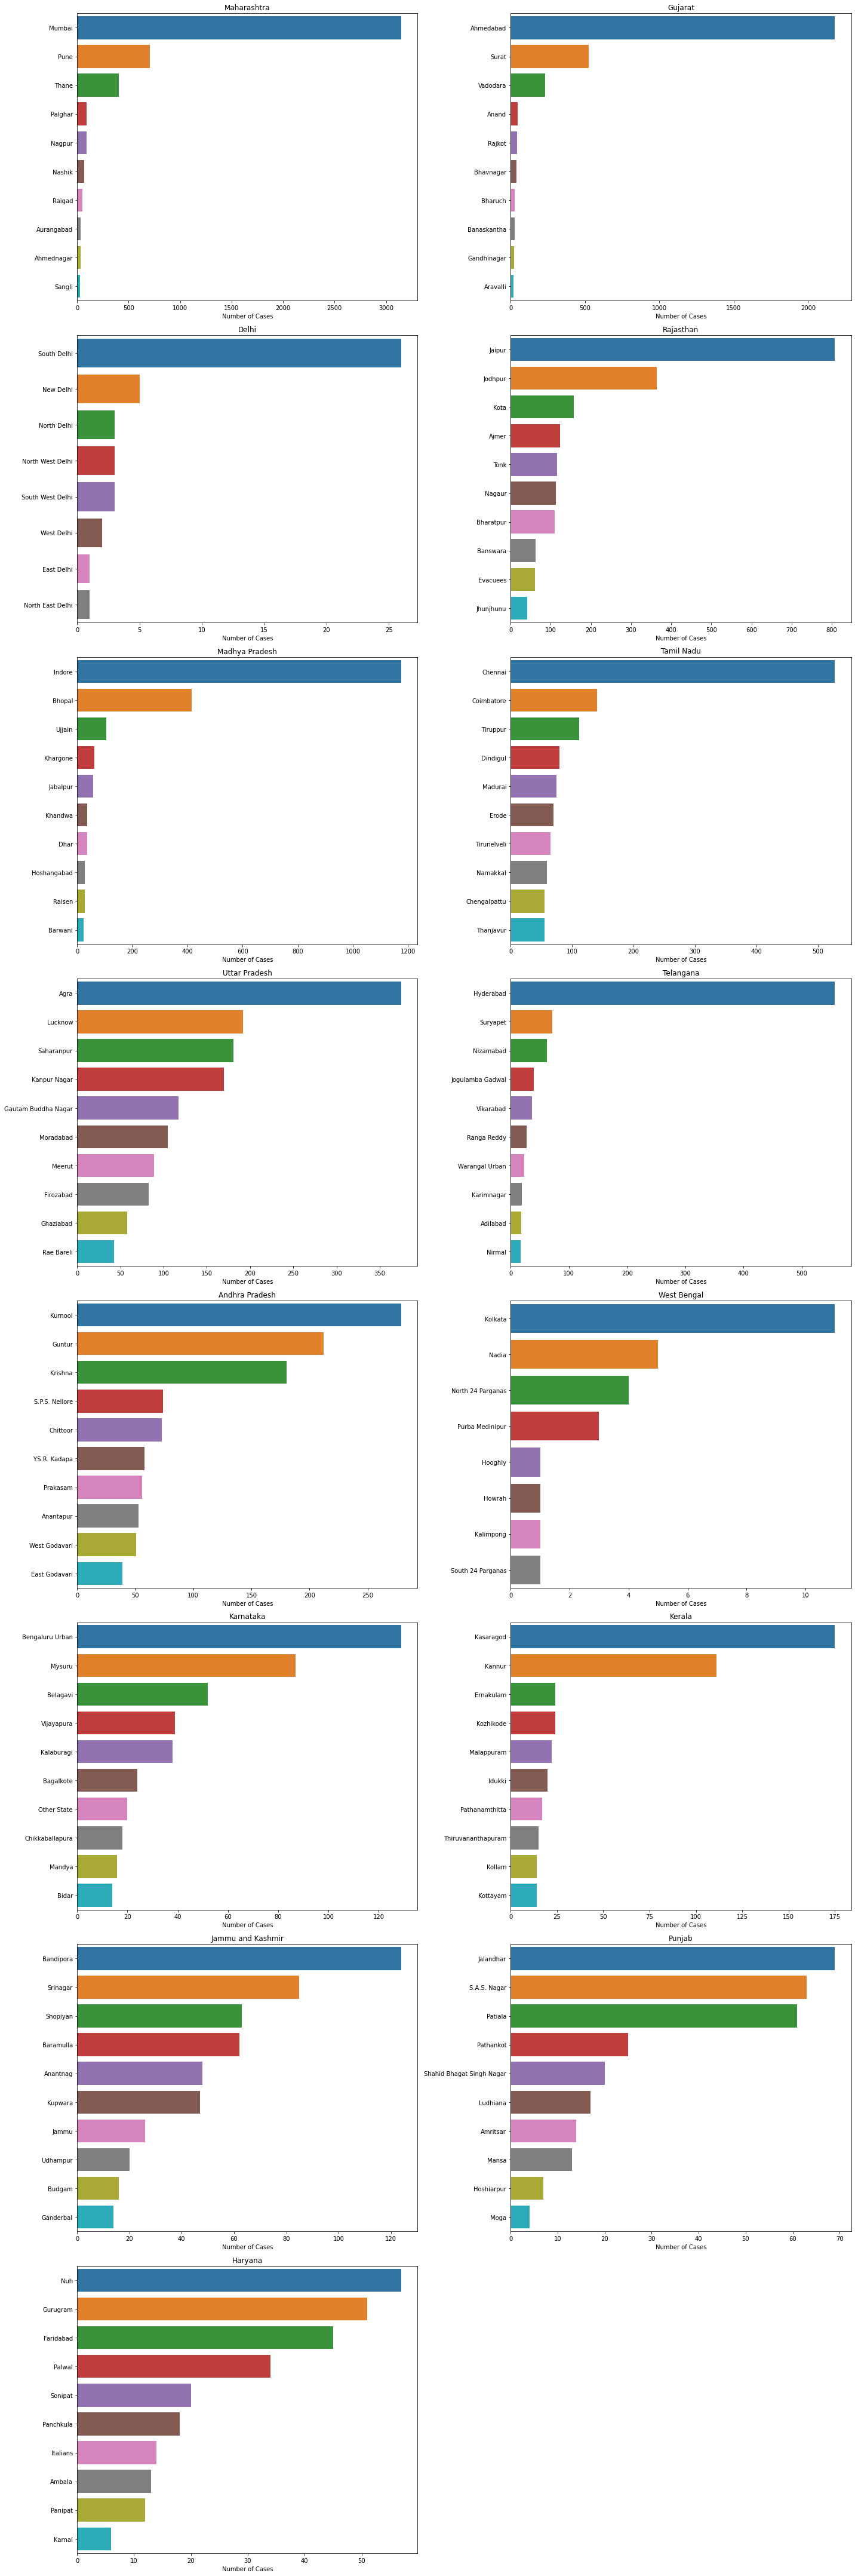

In [ ]:
df3=indiDetails.groupby(['detected_state','detected_district']).count()
df3.reset_index(inplace=True)
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Telangana','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
plt.figure(figsize=(20,60))
for i,state in enumerate(states_list):
    plt.subplot(8,2,i+1)
    df4=df3[df3['detected_state']==state].sort_values('id',ascending=False)
    df4=df4.head(10)
    sns.barplot(data=df4,x='id',y='detected_district')
    plt.xlabel('Number of Cases')
    plt.ylabel('')
    plt.title(state)
plt.tight_layout()
plt.show()

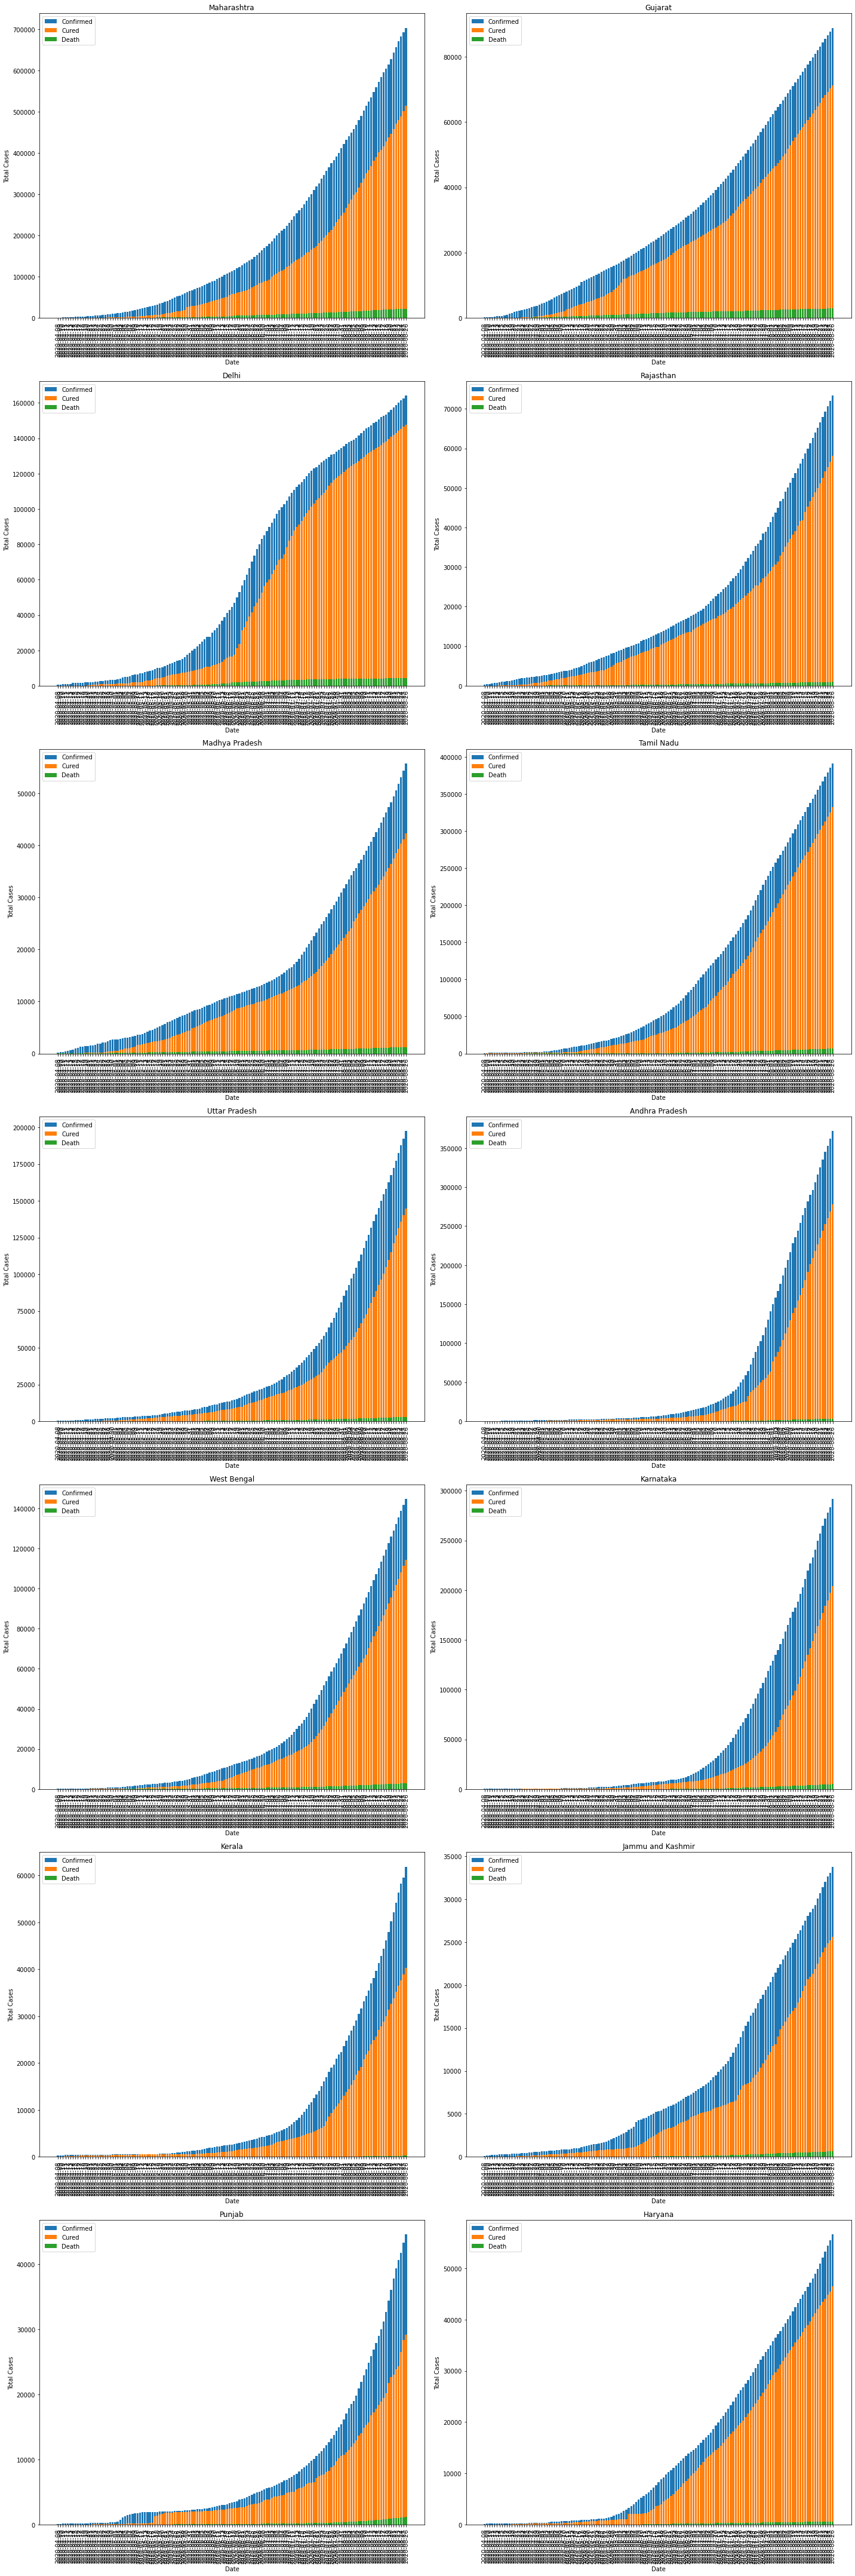

In [ ]:
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
df5=covid19India[covid19India['Date']>'2020-04-07']
df5=df5.groupby(['Date','State/UnionTerritory']).sum()
df5.reset_index(inplace=True)
df5['Date'] = df5['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(20,60))

for i,state in enumerate(states_list):
    plt.subplot(7,2,i+1)
    df4=df5[df5['State/UnionTerritory']==state]
    plt.bar(df4.Date,df4.Confirmed,label='Confirmed')
    plt.bar(df4.Date,df4.Cured,label='Cured')
    plt.bar(df4.Date,df4.Deaths,label='Death')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.ylabel('Total Cases')
    plt.xlabel('Date')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
data=covid19India.groupby(['Date','State/UnionTerritory'])['Confirmed','Cured','Deaths'].sum()
data.reset_index(inplace=True)
data['Date']=data['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))

Testing and healthcare insights

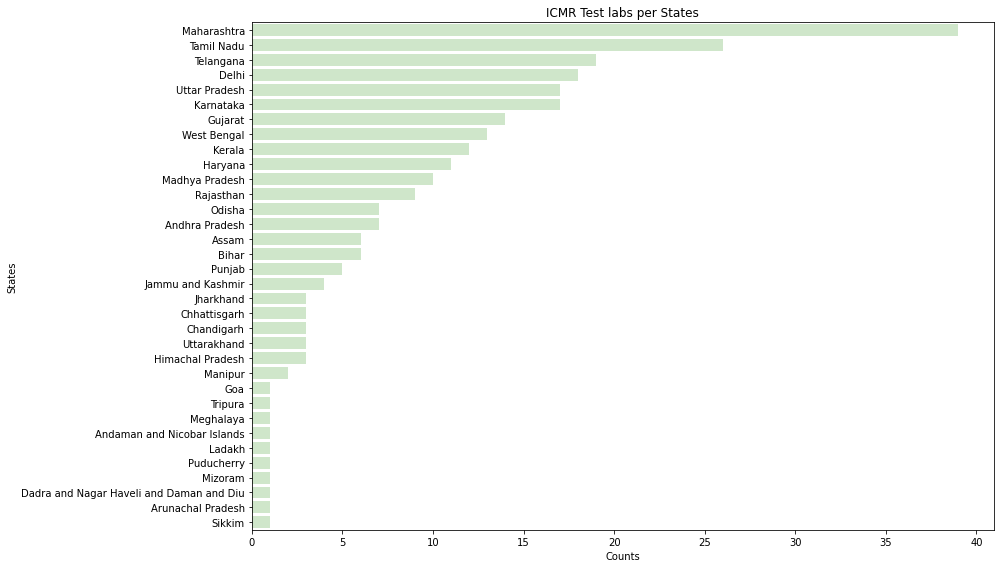

In [ ]:
state=list(icmrTestLabs['state'].value_counts().index)
count=list(icmrTestLabs['state'].value_counts())
plt.figure(figsize=(14,8))
sns.barplot(x=count,y=state,color=sns.color_palette('Set3')[10])
plt.xlabel('Counts')
plt.ylabel('States')
plt.title('ICMR Test labs per States')
plt.tight_layout()

In [ ]:
hospitalBeds.drop(labels=36,inplace=True)

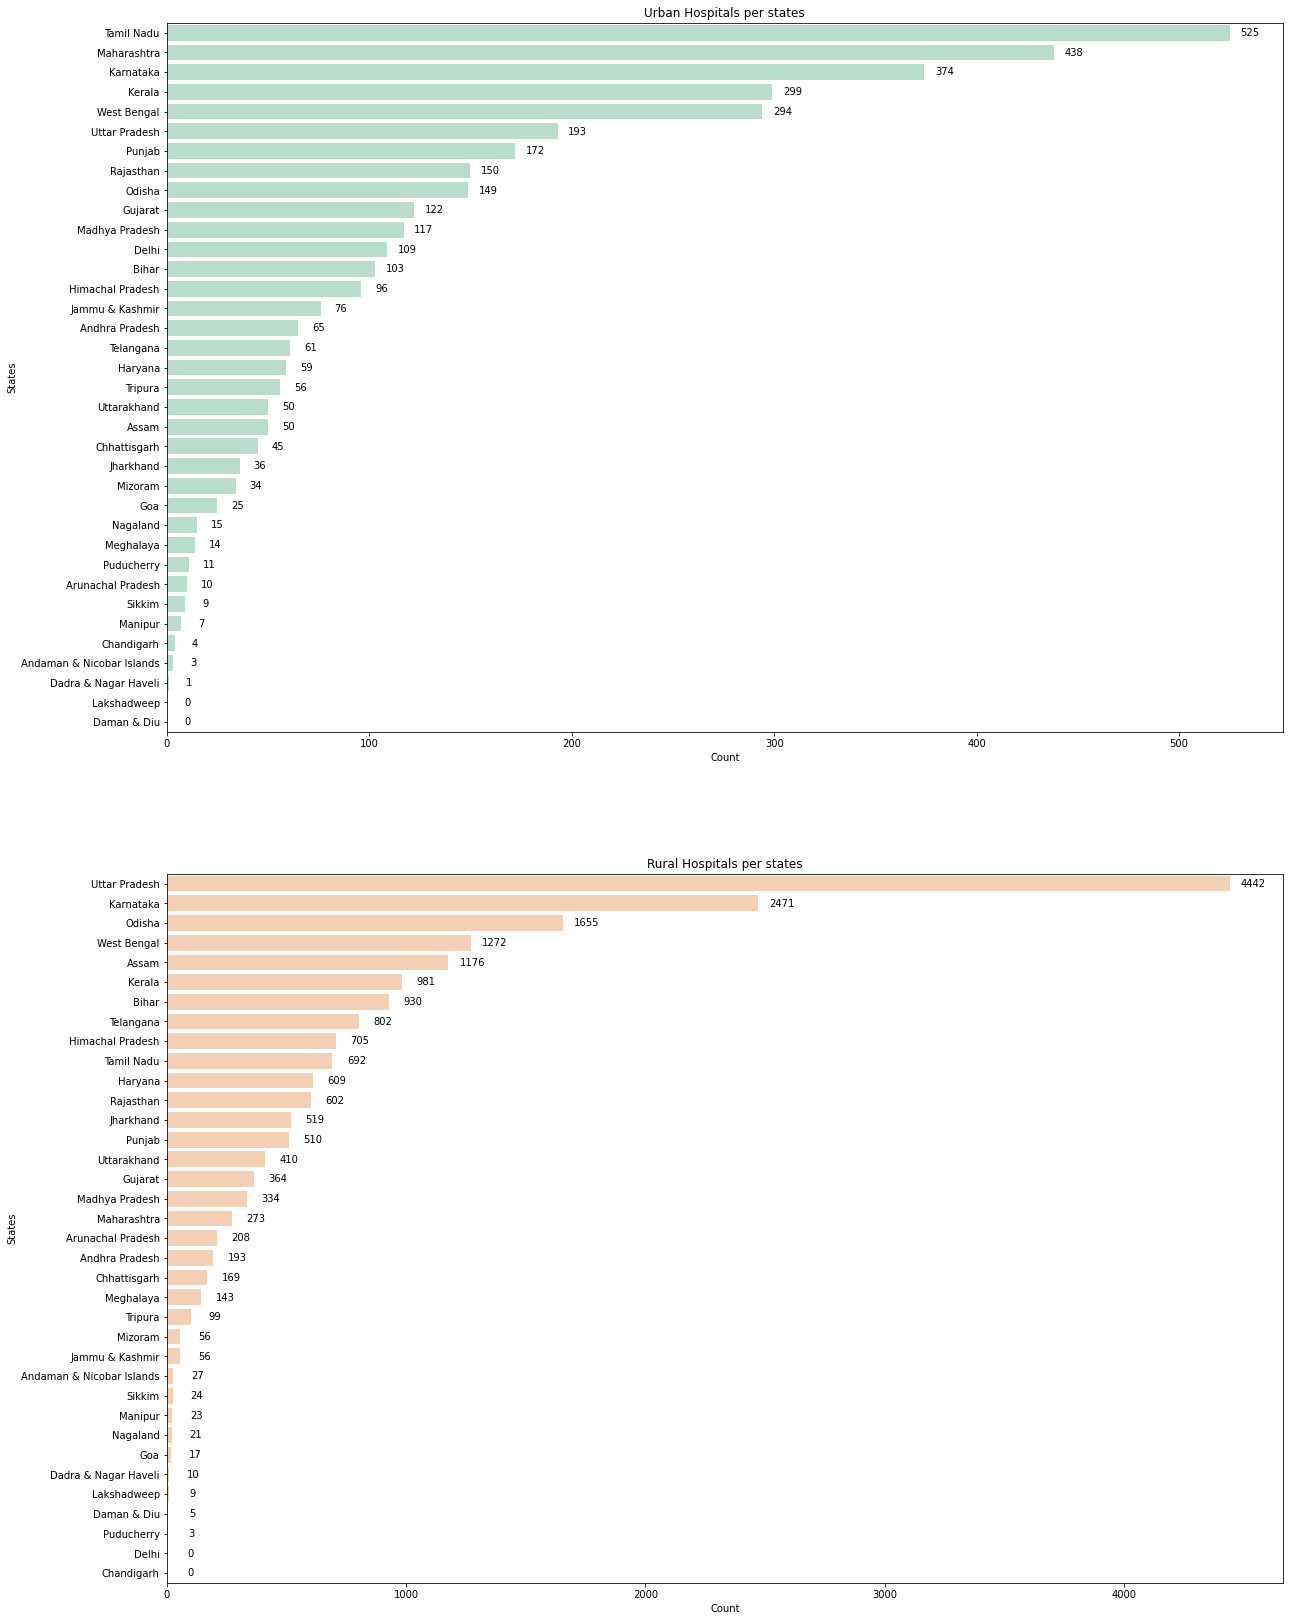

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,60))
plt.subplot(4,1,1)
hospitalBeds=hospitalBeds.sort_values('NumUrbanHospitals_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumUrbanHospitals_NHP18',color=sns.color_palette('Pastel2')[0])
plt.title('Urban Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospitalBeds.shape[0]):
    count = hospitalBeds.iloc[i]['NumUrbanHospitals_NHP18']
    plt.text(count+10,i,count,ha='center',va='center')

plt.subplot(4,1,2)
hospitalBeds=hospitalBeds.sort_values('NumRuralHospitals_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumRuralHospitals_NHP18',color=sns.color_palette('Pastel2')[1])
plt.title('Rural Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospitalBeds.shape[0]):
    count = hospitalBeds.iloc[i]['NumRuralHospitals_NHP18']
    plt.text(count+100,i,count,ha='center',va='center')


plt.show()
plt.tight_layout() 


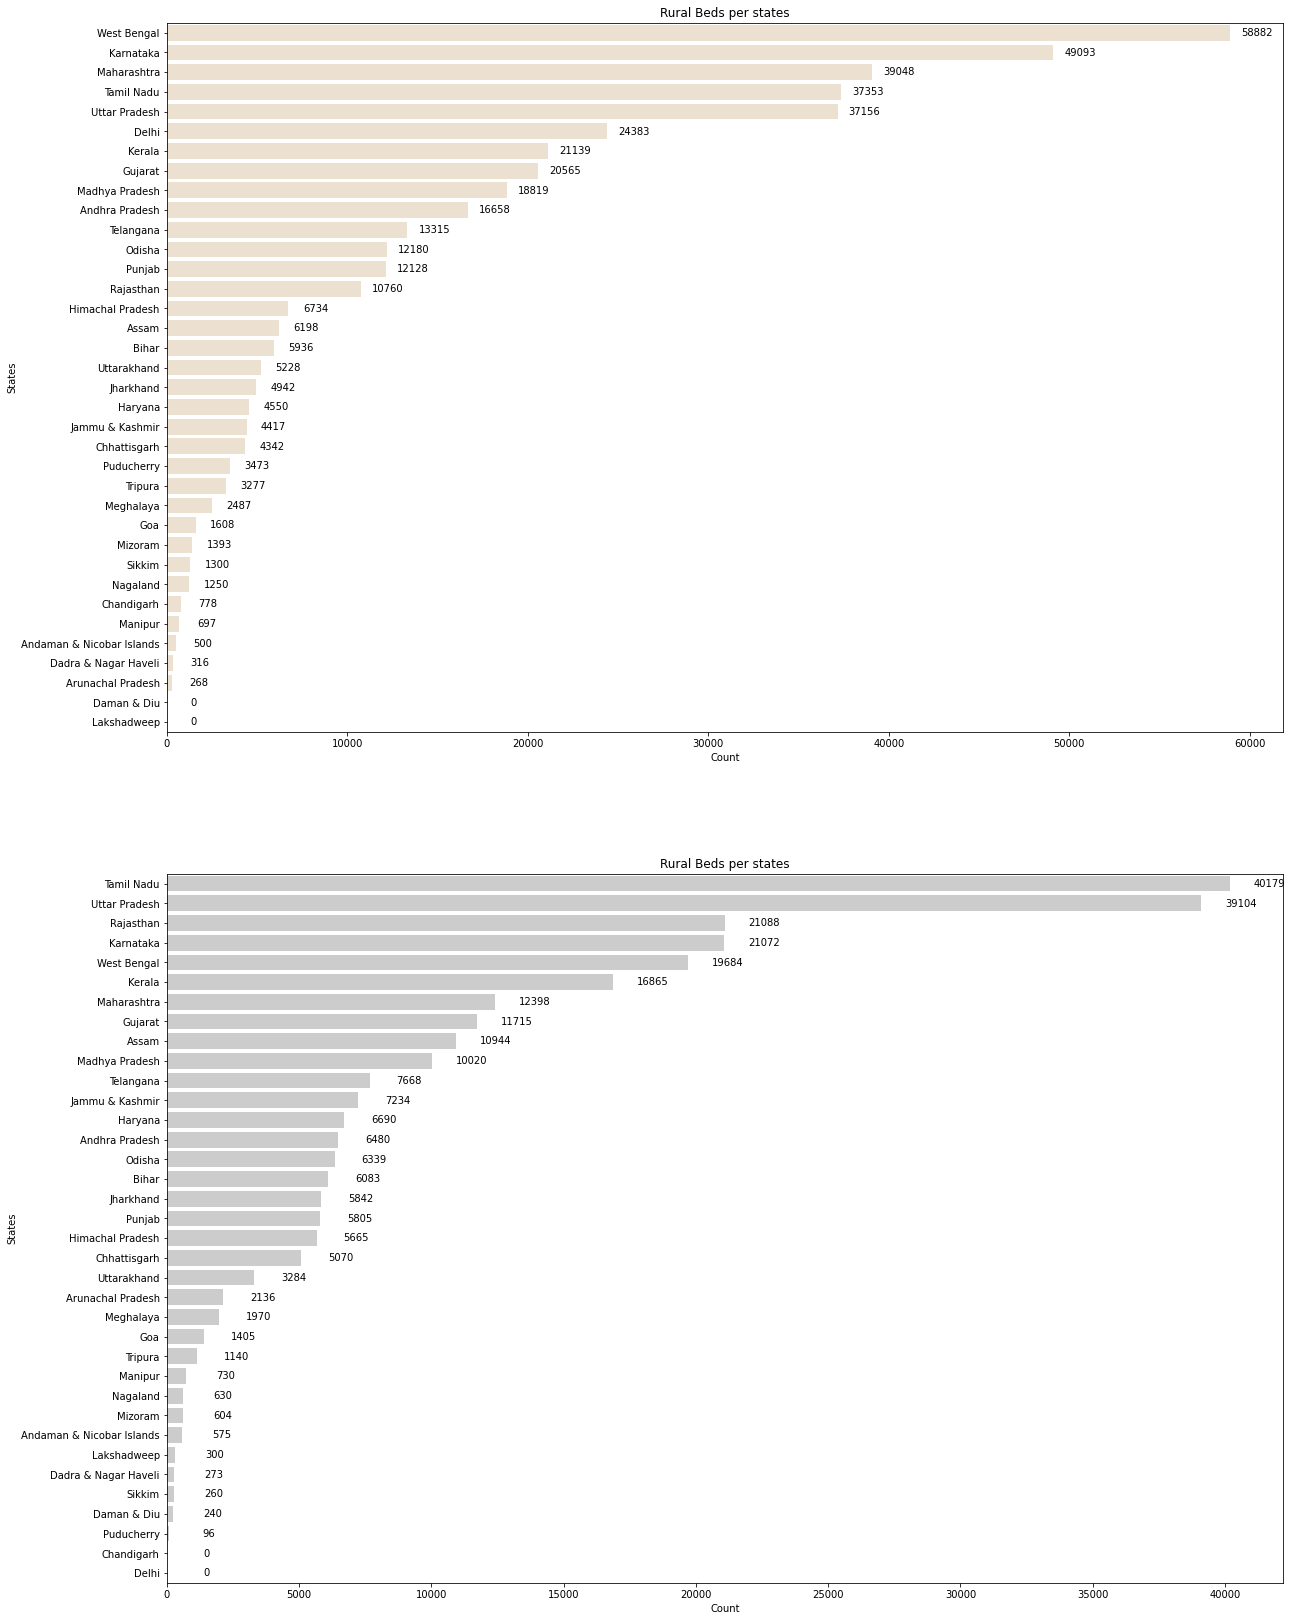

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,60))
plt.subplot(4,1,3)
hospitalBeds=hospitalBeds.sort_values('NumUrbanBeds_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumUrbanBeds_NHP18',color=sns.color_palette('Pastel2')[6])
plt.title('Rural Beds per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospitalBeds.shape[0]):
    count = hospitalBeds.iloc[i]['NumUrbanBeds_NHP18']
    plt.text(count+1500,i,count,ha='center',va='center')

plt.subplot(4,1,4)
hospitalBeds=hospitalBeds.sort_values('NumRuralBeds_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumRuralBeds_NHP18',color=sns.color_palette('Pastel2')[7])
plt.title('Rural Beds per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospitalBeds.shape[0]):
    count = hospitalBeds.iloc[i]['NumRuralBeds_NHP18']
    plt.text(count+1500,i,count,ha='center',va='center')

plt.show()
plt.tight_layout()

Prediction by Prophet Model

In [ ]:
#keeping date and Confirmed columns
df3 = df2[['date' , 'confirmed']]

#Renaming column names according to fb prophet
df3.columns = ['ds' , 'y']

In [ ]:
#importing fbprophet
from fbprophet import Prophet

#model
m = Prophet()

#fitting the model
m.fit(df3)

In [ ]:
#forecast
future = m.make_future_dataframe(periods= 20) 
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)

In [ ]:
#fig1 = m.plot(forecast)
#fig2 = m.plot_components(forecast)
from fbprophet.plot import plot_plotly
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(
                  autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Total cases Forecast<b>',
    title_x=0.5,
    paper_bgcolor='khaki',
    plot_bgcolor = "khaki",)
fig.show()

In [ ]:
df4 = df2[['date' , 'deaths']]

df4.columns = ['ds', 'y']
m = Prophet()
m.fit(df4)
future = m.make_future_dataframe(periods= 20) 
#future.tail()
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Deaths  Forecast<b>',
    title_x=0.5,
    paper_bgcolor='rgb(245, 219, 147)',
    plot_bgcolor = "rgb(245, 219, 147)",)
fig.show()